### Декомпозиция:

#### 1. Загрузим данные и выведем общую информацию
- ##### Импортируем библиотеки
- ##### Откроем датасеты и посмотрим общую информацию о таблицах

#### 2. Предобработка данных
- ##### Приведем название столбцов к нужному виду
- ##### Преобразуем столбцы с датами к нужному формату

#### 3. Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.
- get_profiles() — для создания профилей пользователей,
- get_retention() — для подсчёта Retention Rate,
- get_conversion() — для подсчёта конверсии,
- get_ltv() — для подсчёта LTV.
- filter_data() — для сглаживания данных,
- plot_retention() — для построения графика Retention Rate,
- plot_conversion() — для построения графика конверсии,
- plot_ltv_roi — для визуализации LTV и ROI.

#### 4. Исследовательский анализ данных
- ##### Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.
- ##### Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- ##### Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- ##### Изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

#### 5. Маркетинг
- ##### Посчитаем общую сумму расходов на маркетинг.
- ##### Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- ##### Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.
- ##### Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

#### 6. Оценим окупаемость рекламы
- ##### Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- ##### Проверим конверсию пользователей и динамику её изменения.
- ##### Проанализируем окупаемость рекламы с разбивкой по устройствам.
- ##### Проанализируем окупаемость рекламы с разбивкой по странам. 
- ##### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. 

#### 7. Выводы
--- 

#### 1. Загрузим данные и выведем общую информацию
##### Импортируем библиотеки

In [1]:
# Импортируем библиотеки и прочитаем файлы
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime, timedelta
import plotly.io as pio
pio.renderers.default = "png"

# Зададим настройки отображения
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

##### Откроем датасеты и посмотрим общую информацию о таблицах

In [2]:
# Прочитаем файл
try:
    visits = pd.read_csv('practicum_datasets/visits_info_short.csv')
except:
    visits = pd.read_csv('datasets/visits_info_short.csv')

# Выводим первые 5 строк
visits.head(5)

# Выводим общую информацию
visits.info()

# Выводим кол-во пропусков
display('Пропуски:', visits.isna().sum())

# Выводим кол-во дубликатов
display('Дубликаты:', visits.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


'Пропуски:'

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

'Дубликаты:'

0

In [3]:
# Прочитаем файл
try:
    orders = pd.read_csv('practicum_datasets/orders_info_short.csv')
except:
    orders = pd.read_csv('datasets/orders_info_short.csv')

# Выводим первые 5 строк
orders.head(5)

# Выводим общую информацию
orders.info()

# Выводим кол-во пропусков
display('Пропуски:', orders.isna().sum())

# Выводим кол-во дубликатов
display('Дубликаты:', orders.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


'Пропуски:'

User Id     0
Event Dt    0
Revenue     0
dtype: int64

'Дубликаты:'

0

In [4]:
# Прочитаем файл
try:
    costs = pd.read_csv('practicum_datasets/costs_info_short.csv')
except:
    costs = pd.read_csv('datasets/costs_info_short.csv')

# Выводим первые 5 строк
costs.head(5)

# Выводим общую информацию
costs.info()

# Выводим кол-во пропусков
display('Пропуски:', costs.isna().sum())

# Выводим кол-во дубликатов
display('Дубликаты:', costs.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


'Пропуски:'

dt         0
Channel    0
costs      0
dtype: int64

'Дубликаты:'

0

**Вывод:** в датасетах:
- visits - 309901 строк
- orders - 40212 строк
- costs - 1800 строк

Во всех датасетах пропусков и явных дубликатов не обнаружено.

#### 2. Предобработка данных

##### Приведем название столбцов к нужному виду

In [5]:
# Датафрейм visits
visits = visits.rename(columns={'User Id': 'user_id', 'Region': 'region', 'Device': 'device', \
                                'Channel': 'channel', 'Session Start': 'session_start', \
                                'Session End': 'session_end'})
# Датафрейм orders
orders = orders.rename(columns={'User Id': 'user_id', 'Event Dt': 'event_dt', 'Revenue': 'revenue'})

# Датафрейм costs
costs = costs.rename(columns={'Channel': 'channel'})

##### Преобразуем столбцы с датами к нужному формату

In [6]:
# Датафрейм visits
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

# Датафрейм orders
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

# Датафрейм costs
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

**Вывод:** данные в порядке (пропусков нет), столбцы с временем приведены в нужный формат, название столбцов переименнованы в соответствии с регистром.

#### 3. Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

Функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

Функции для вычисления метрик:

In [7]:
# 1. get_profiles() — для создания профилей пользователей

def get_profiles(sessions, orders, ad_costs, event_names=[]):

    profiles = (sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg({'session_start': 'first',
             'channel': 'first',
             'device': 'first',
             'region': 'first'})
        
        .rename(columns={'session_start': 'first_ts'})
        .reset_index())
    
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique())

    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index())

    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left')

    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [8]:
# 2. get_retention() — для подсчёта Retention Rate

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,):

    dimensions = ['payer'] + dimensions

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1)
        
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left')
    
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique')
        
        cohort_sizes = (df.groupby(dims)
                       .agg({'user_id': 'nunique'})
                       .rename(columns={'user_id': 'cohort_size'}))
        
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days)

    return result_raw, result_grouped, result_in_time 

In [9]:
# 3. get_conversion() — для подсчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1)
        
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    first_purchases = (purchases.sort_values(by=['user_id', 'event_dt'])
                      .groupby('user_id')
                      .agg({'event_dt': 'first'})
                      .reset_index())

    result_raw = result_raw.merge(first_purchases[['user_id', 'event_dt']], on='user_id', how='left')

    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_ts']).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique')
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'}))
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
 
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    if 'cohort' in dimensions: 
        dimensions = []

    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days)

    return result_raw, result_grouped, result_in_time

In [10]:
# 4. LTV и ROI

def get_ltv(profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False):
    
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1)
        
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
  
    result_raw = result_raw.merge(purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left')
    
    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_ts']).dt.days
    
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum')
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'}))
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes

        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        cac = (cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'}))

        roi = result.div(cac['cac'], axis=0)

       

        roi['cohort_size'] = cohort_sizes

        roi['cac'] = cac['cac']

        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    if 'cohort' in dimensions:
        dimensions = []
        
    result_in_time, roi_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)

    return (result_raw,
        result_grouped,
        result_in_time,
        roi_grouped,
        roi_in_time)

Функции для построения графиков:

In [11]:
# 1. filter_data() — для сглаживания данных

def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [12]:
# 2. plot_retention() — для построения графика Retention Rate

def plot_retention(retention, retention_history, horizon, window=7):

    plt.figure(figsize=(15, 10))

    retention = retention.drop(columns=['cohort_size', 0])
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]]

    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    ax3 = plt.subplot(2, 2, 3)
   
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']]
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика удержания платящих пользователей на {}-й день'.format(horizon))

    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика удержания неплатящих пользователей на {}-й день'.format(horizon))
    
    plt.tight_layout()
    plt.show() 

In [13]:
# 3. plot_conversion() — для построения графика конверсии

def plot_conversion(conversion, conversion_history, horizon, window=14):

    plt.figure(figsize=(15, 5))

    conversion = conversion.drop(columns=['cohort_size'])
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]]

    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        name for name in conversion_history.index.names if name not in ['dt']]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [14]:
# 4. plot_ltv_roi — для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 20))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    cac_history = roi_history[['cac']]

    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]]

    ax1 = plt.subplot(3, 2, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    ax2 = plt.subplot(3, 2, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    ax3 = plt.subplot(3, 2, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean')
    
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    ax4 = plt.subplot(3, 2, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    ax5 = plt.subplot(3, 2, 5, sharey=ax4)
  
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean')
    
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### 4. Исследовательский анализ данных
##### Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.

In [15]:
# Применяем функцию get_profiles
profiles = get_profiles(visits, orders, costs)

# Выводим первые 5 строк датасета
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [16]:
# Задаем минимальную дату
min_analysis_date = profiles['dt'].min()

# Задаем максимальную дату
max_analysis_date = profiles['dt'].max()

# Выводим результат
print(f'Минимальная дата привлечения пользователей: {min_analysis_date}')
print(f'Максимальная дата привлечения пользователей: {max_analysis_date}')

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


##### Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [17]:
# Создадим таблицу с количеством пользователей и долей платящих из каждой страны
# Создаем таблицу с кол-вом пользователей по регионам
amount_users_region = (profiles.groupby(['region'])
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'count_users'}))

# Создаем таблицу с платящами пользователями по регионам
paying_users_region = (profiles.query('payer == True')
    .groupby(['region'])
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'paying_users'}))

# Объединяем таблицы
user_region = (paying_users_region.merge(amount_users_region, on=['region'], how='left')
    .sort_values('paying_users', ascending=False)
    .reset_index())

# Находим  процент платящих пользователей
user_region['paying_users_persent'] = (
    user_region['paying_users'] / user_region['count_users'] *100)

display(user_region)

,region,paying_users,count_users,paying_users_persent
0,United States,6902,100002,6.901862
1,UK,700,17575,3.982930
2,France,663,17450,3.799427
3,Germany,616,14981,4.111875


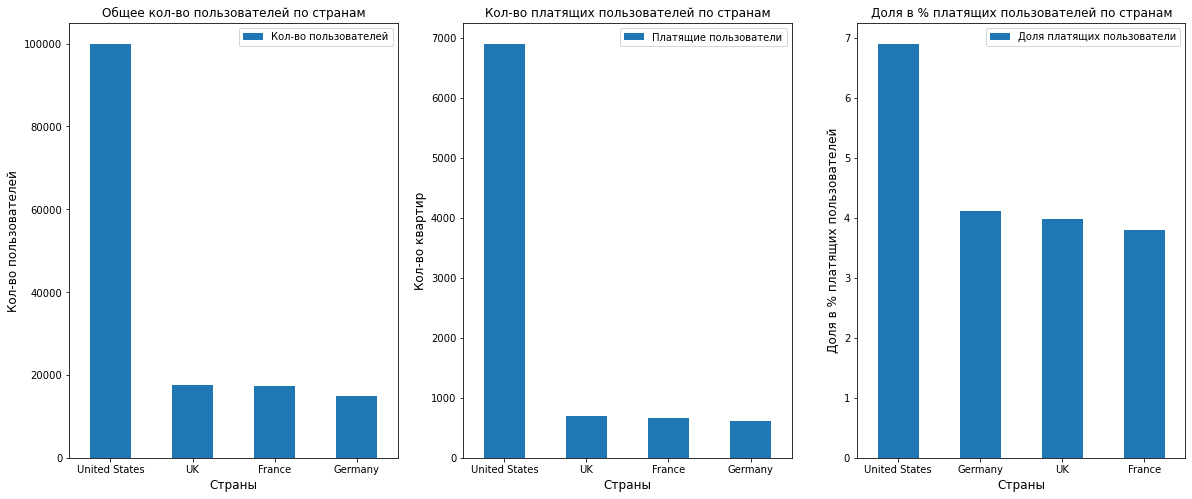

In [18]:
# Строим графики
plt.figure(figsize=(20, 8))

# Общее кол-во пользователей по странам
user_region.sort_values('count_users', ascending=False).plot(x='region', y='count_users', kind='bar',
rot=0, label='Кол-во пользователей', ax=plt.subplot(1,3,1)).set(title='Общее кол-во пользователей по странам')
plt.xlabel('Страны', fontsize = 12)
plt.ylabel('Кол-во пользователей', fontsize = 12)

# Кол-во платящих пользователей по странам
user_region.plot(x='region', y='paying_users', kind='bar', rot=0, label='Платящие пользователи', 
ax=plt.subplot(1,3,2)).set(title='Кол-во платящих пользователей по странам') 
plt.xlabel('Страны', fontsize = 12)
plt.ylabel('Кол-во квартир', fontsize = 12)

# Доля в % платящих пользователей по странам
user_region.sort_values('paying_users_persent', ascending=False).plot(x='region', y='paying_users_persent',
kind='bar', rot=0, label='Доля платящих пользователи', 
ax=plt.subplot(1,3,3)).set(title='Доля в % платящих пользователей по странам')
plt.xlabel('Страны', fontsize = 12)
plt.ylabel('Доля в % платящих пользователей', fontsize = 12)
plt.show()

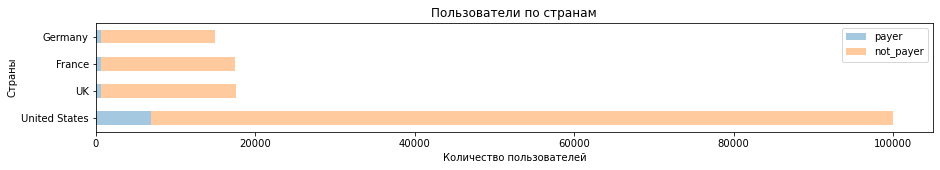

In [19]:
# Задаем таблицу
region = (profiles.pivot_table(index='region', columns='payer', values='user_id', aggfunc='count')
          .rename(columns={True: 'payer', False: 'not_payer'})
          .sort_values(by='payer', ascending=False))

# Строим график
fig, ax = plt.subplots(figsize=(15, 2))
region[['payer', 'not_payer']].plot(kind='barh', stacked=True, ax=ax, alpha=0.4)

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Количество пользователей')
ax.set_ylabel('Страны')
ax.set_title('Пользователи по странам')
plt.show()

Доля платящих и неплатящих пользователей в США заметно превышает долю пользователей из Великобритании, Франции, Германии.

##### Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [20]:
# Создадим таблицу с количеством пользователей и долей платящих из каждого устройства
# Создаем таблицу с кол-вом пользователей в разрезе по устройствам
amount_users_device = (profiles.groupby(['device'])
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'count_users'}))

# Создаем таблицу с платящами пользователями по устройствам
paying_users_device = (profiles.query('payer == True')
    .groupby(['device'])
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'paying_users'}))

# Соединям таблицы
user_device = (paying_users_device.merge(amount_users_device, on=['device'], how='left')
    .sort_values('paying_users', ascending=False)
    .reset_index())

# Находим  процент платящих пользователей
user_device['paying_users_persent'] = (
    user_device['paying_users'] / user_device['count_users'] *100)

display(user_device)

,device,paying_users,count_users,paying_users_persent
0,iPhone,3382,54479,6.207897
1,Android,2050,35032,5.851793
2,Mac,1912,30042,6.364423
3,PC,1537,30455,5.046790


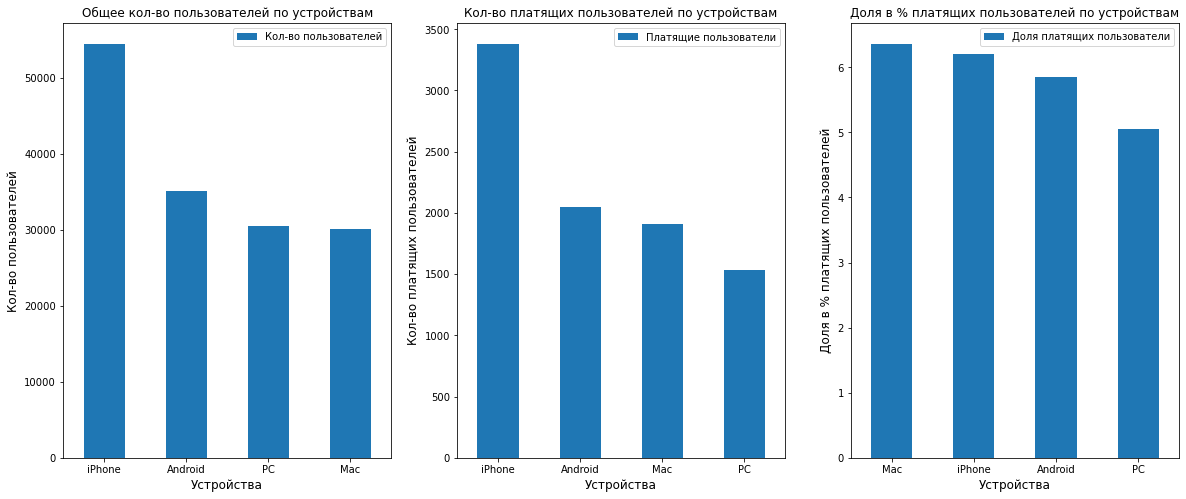

In [21]:
# Строим графики
plt.figure(figsize=(20, 8))

# Общее кол-во пользователей по устройствам
user_device.sort_values('count_users', ascending=False).plot(x='device', y='count_users', kind='bar',
rot=0, label='Кол-во пользователей', ax=plt.subplot(1,3,1)).set(
title='Общее кол-во пользователей по устройствам')
plt.xlabel('Устройства', fontsize = 12)
plt.ylabel('Кол-во пользователей', fontsize = 12)

# Кол-во платящих пользователей по устройствам
user_device.plot(x='device', y='paying_users', kind='bar', rot=0, label='Платящие пользователи', 
ax=plt.subplot(1,3,2)).set(title='Кол-во платящих пользователей по устройствам')
plt.xlabel('Устройства', fontsize = 12)
plt.ylabel('Кол-во платящих пользователей', fontsize = 12)

# Доля в % платящих пользователей по устройствам
user_device.sort_values('paying_users_persent', ascending=False).plot(x='device', y='paying_users_persent',
kind='bar', rot=0, label='Доля платящих пользователи', 
ax=plt.subplot(1,3,3)).set(title='Доля в % платящих пользователей по устройствам')
plt.xlabel('Устройства', fontsize = 12)
plt.ylabel('Доля в % платящих пользователей', fontsize = 12)
plt.show()

Продукция Apple занимает лидирующие позиции по кол-ву пользователей и платящих пользователей

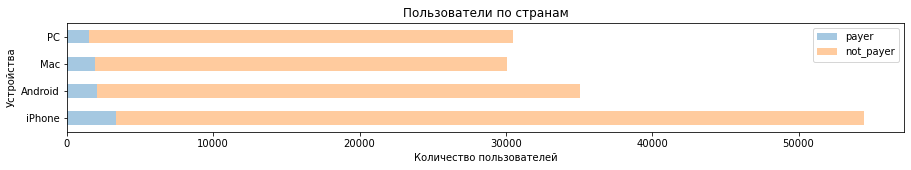

In [22]:
# Задаем таблицу
device = (profiles.pivot_table(index='device', columns='payer', values='user_id', aggfunc='count')
          .rename(columns={True: 'payer', False: 'not_payer'})
          .sort_values(by='payer', ascending=False))

# Строим график
fig, ax = plt.subplots(figsize=(15, 2))
device[['payer', 'not_payer']].plot(kind='barh', stacked=True, ax=ax, alpha=0.4)

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Количество пользователей')
ax.set_ylabel('Устройства')
ax.set_title('Пользователи по странам')
plt.show()

Мы видим что компания Apple в сегментах смартфонов и компьютеров обгоняет своих конкурентов по количеству платящих пользователей. Андроид уступает Айфону по кол-ву платящих и не платящих пользователей. У ПС в целом пользователей больше, чем у МАК, но платящих - меньше.

##### Изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [23]:
# Создадим таблицу с количеством пользователей и долей платящих из каждого устройства
# Создаем таблицу с кол-вом пользователей по рекламным источникам
amount_users_channel = (profiles.groupby(['channel'])
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'count_users'}))

# Создаем таблицу с платящами пользователями по рекламным источникам
paying_users_channel = (profiles.query('payer == True')
    .groupby(['channel'])
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'paying_users'}))

# Соединям таблицы
user_channel = (amount_users_channel.merge(paying_users_channel, on=['channel'], how='left')
    .sort_values('paying_users', ascending=False)
    .reset_index())

# Находим  процент платящих пользователей
user_channel['paying_users_persent'] = (
    user_channel['paying_users'] / user_channel['count_users'] * 100)

display(user_channel)

,channel,count_users,paying_users,paying_users_persent
0,FaceBoom,29144,3557,12.204914
1,TipTop,19561,1878,9.600736
2,organic,56439,1160,2.055316
3,WahooNetBanner,8553,453,5.296387
4,AdNonSense,3880,440,11.340206
5,RocketSuperAds,4448,352,7.913669
6,LeapBob,8553,262,3.063253
7,OppleCreativeMedia,8605,233,2.707728
8,lambdaMediaAds,2149,225,10.469986
9,YRabbit,4312,165,3.826531


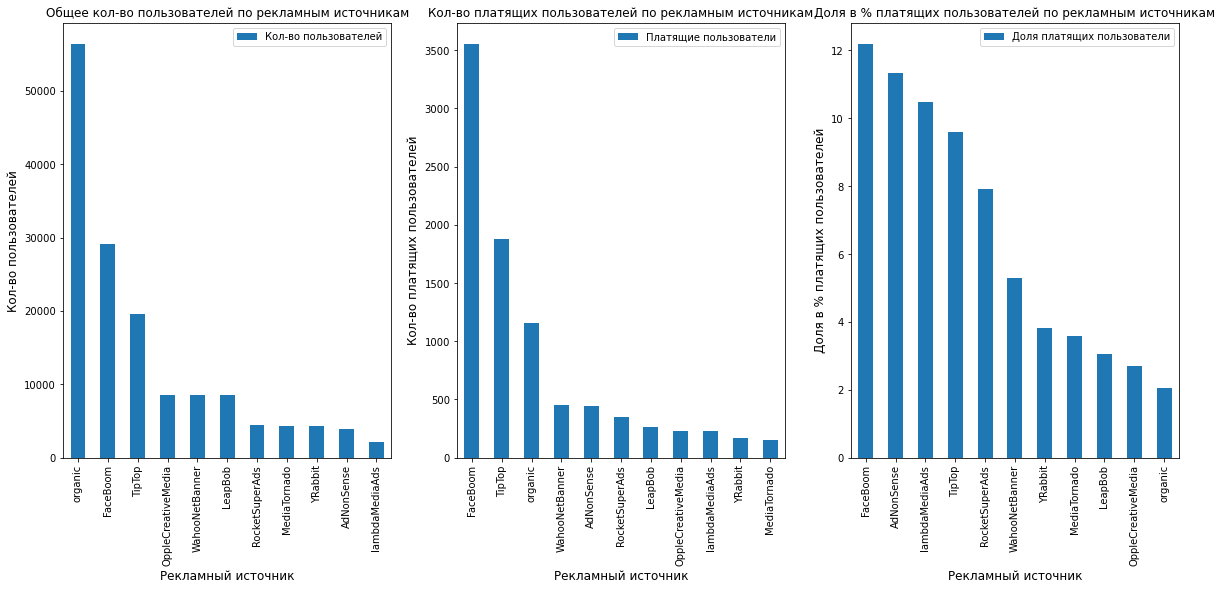

In [24]:
# Строим графики
plt.figure(figsize=(20, 8))

# Кол-во пользователей по рекламным источникам
user_channel.sort_values('count_users', ascending=False).plot(x='channel', y='count_users', kind='bar',
rot=90, label='Кол-во пользователей', 
ax=plt.subplot(1,3,1)).set(title='Общее кол-во пользователей по рекламным источникам')
plt.xlabel('Рекламный источник', fontsize = 12)
plt.ylabel('Кол-во пользователей', fontsize = 12)

# Кол-во платящих пользователей по рекламным источникам
user_channel.plot(x='channel', y='paying_users', kind='bar', rot=90, label='Платящие пользователи', 
ax=plt.subplot(1,3,2)).set(title='Кол-во платящих пользователей по рекламным источникам')
plt.xlabel('Рекламный источник', fontsize = 12)
plt.ylabel('Кол-во платящих пользователей', fontsize = 12)

# Доля в % платящих пользователей по рекламным источникам
user_channel.sort_values('paying_users_persent', ascending=False).plot(x='channel', y='paying_users_persent',
kind='bar', rot=90, label='Доля платящих пользователи', 
ax=plt.subplot(1,3,3)).set(title='Доля в % платящих пользователей по рекламным источникам')
plt.xlabel('Рекламный источник', fontsize = 12)
plt.ylabel('Доля в % платящих пользователей', fontsize = 12)
plt.show()

Лидером по платящим пользователям является - FaceBoom, аутсайдером - MediaTomado.
График доли платящих пользователей по отношению к графику платящих пользователей может говорить нам о том, что следующие компании - AdNonSense, lambdaMediaAds, TipTop, RocketSuperAds дают хороший приток трафика.


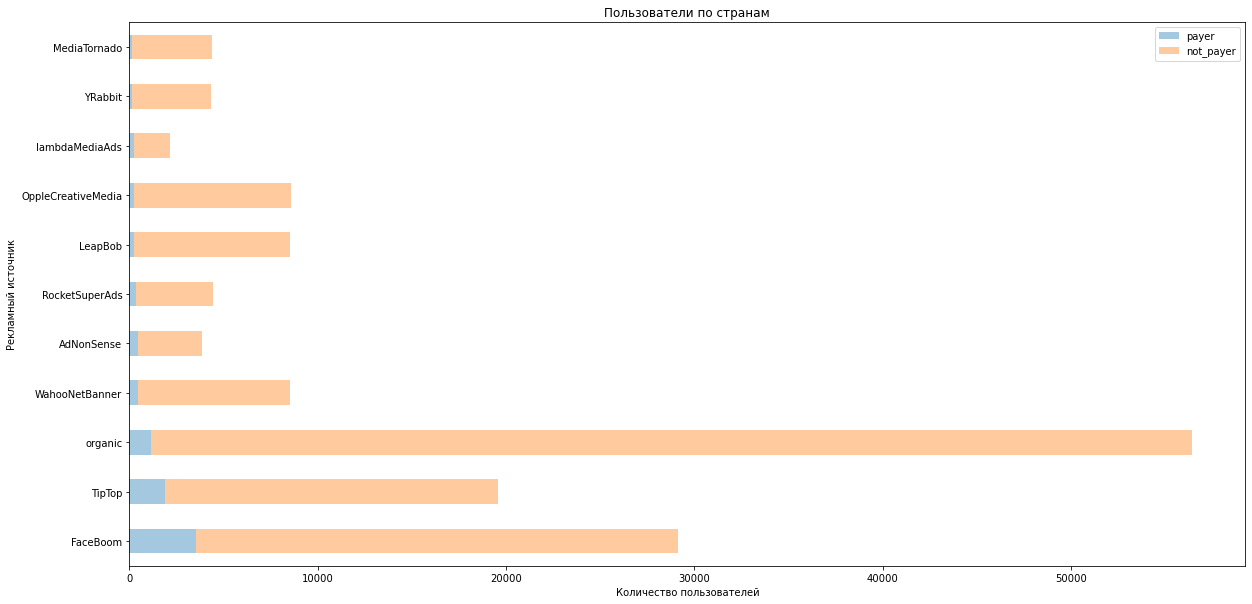

In [25]:
# Задаем таблицу
channel = (profiles.pivot_table(index='channel', columns='payer', values='user_id', aggfunc='count')
          .rename(columns={True: 'payer', False: 'not_payer'})
          .sort_values(by='payer', ascending=False))

# Строим график
fig, ax = plt.subplots(figsize=(20, 10))
channel[['payer', 'not_payer']].plot(kind='barh', stacked=True, ax=ax, alpha=0.4)

ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Количество пользователей')
ax.set_ylabel('Рекламный источник')
ax.set_title('Пользователи по странам')
plt.show()

TipTop и FaceBoom являются лидерами по платящим пользователям. Остальные приложения имеют слабый приток платящих пользователей

#### Вывод: 
- Количество платящих пользователей в США больше, чем в остальных странах. Возможно следует скорректировать маркетинговую компанию в остальных странах, чтобы улучшить кол-во платящих пользователей. 

- Так же стоит отметить факт того, что продукция Apple имеет в целом более лояльную аудиторию, которая готова платить за контент.

- Исходя из данных привлечения аудитории с приложений - можно сделать сказать, что в целом приложения слабо привлекают аудиторию, за исключением FaceBoom и TipTop. Возможно, стоит попробовать другие источники привлечения аудитории.

#### 5. Маркетинг
##### Посчитайте общую сумму расходов на маркетинг.

In [26]:
# Считаем сумму
marketing_total_cost = round(costs['costs'].sum())
print(f'Cумма расходов на маркетинга - {marketing_total_cost}')

Cумма расходов на маркетинга - 105497


##### Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [27]:
# Создаем таблицу каналов привлечения и суммой цен
sum_channel_costs = (costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False))

# Создаем столбец с процентом цены
sum_channel_costs['cost_persent'] = round((sum_channel_costs['costs'] 
                                           / sum_channel_costs['costs'].sum()) * 100, 1)

# Выводим таблицу
display(sum_channel_costs)

,costs,cost_persent
channel,,
TipTop,54751.30,51.9
FaceBoom,32445.60,30.8
WahooNetBanner,5151.00,4.9
AdNonSense,3911.25,3.7
OppleCreativeMedia,2151.25,2.0
RocketSuperAds,1833.00,1.7
LeapBob,1797.60,1.7
lambdaMediaAds,1557.60,1.5
MediaTornado,954.48,0.9


TipTop и FaceBoom занимают 80% расходов компании, когда как остальные 20% распределены на остальные 8 компаний

##### Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. 

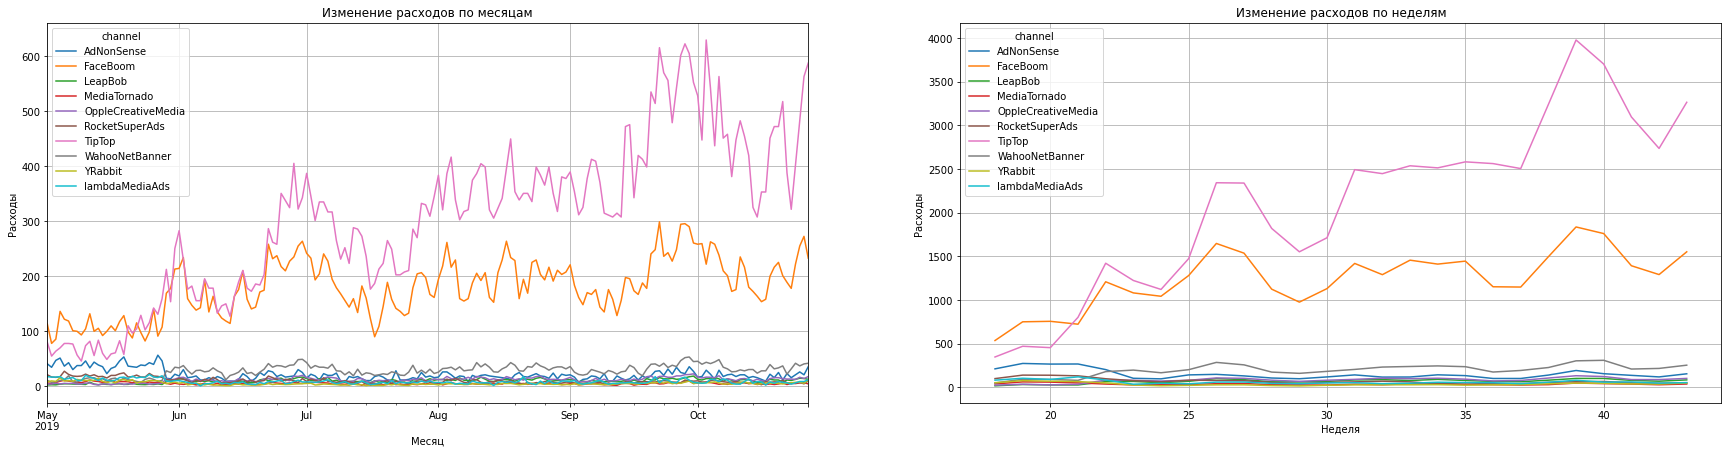

In [28]:
# Приводим столбцы к нужному типу
costs['dt'] = pd.to_datetime(costs['dt'])

# Выделяем месяц
costs['month'] = costs['dt'].dt.month 

# Выделяем неделю
costs['week'] = costs['dt'].dt.isocalendar().week

# Строим график изменения расходов по месяцам
plt.figure(figsize=(30, 7))
costs.pivot_table(index='dt', columns='channel', values='costs', aggfunc='sum')\
.plot(grid=True, ax=plt.subplot(1,2,1))\
.set(title='Изменение расходов по месяцам', xlabel='Месяц', ylabel='Расходы');

# Строим график изменения расходов по неделям
costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum')\
.plot(grid=True, ax=plt.subplot(1,2,2))\
.set(title='Изменение расходов по неделям', xlabel='Неделя',ylabel='Расходы')
plt.show()

На графике так же выделяется лидерство по расходам каналов TipTop и FaceBoom. Можно выделить активный рост расходов на TipTop. FaceBoom являетяс вторым каналом по расходу бюджета, но затраты распределяются более равномерно. Остальные каналы находятся примерно на одном уровне по расходам.

##### Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. 

In [29]:
# Строим таблицу привлечение одного пользователя
cac = (profiles.pivot_table(index = 'channel',values = 'acquisition_cost', aggfunc='mean')
               .sort_values(by='acquisition_cost', ascending=False)\
               .rename(columns={'acquisition_cost': 'cac'}))

# Выводим таблицу
display(cac)

,cac
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


In [30]:
# Находим среднее значение cac
avg_cac = profiles.query('channel != "organic"')[['user_id', 'acquisition_cost']]\
                  .drop_duplicates().agg({'acquisition_cost': 'mean'})

# Выводим значение
print('Среднее значение САС на пользователя:', avg_cac)

Среднее значение САС на пользователя: acquisition_cost    1.127481
dtype: float64


Лидерами по стоимости привлечения клиента TipTop и FaceBoom - каналы, которые расходуют больше всего бюджета. У канала AdNonSense стоимость привлечения почти как у FaceBoom.

**Вывод:**
При суммарных расходах на маркетинг в 105497, 80% идут на 2 канала из 10 - TipTop и FaceBoom. Важно отметить, что при затратах в 30% бюджета на канал FaceBoom, он дает больше клиентов, чем лидер по тратам - TipTop. Стоимость привлечения клиента так же ниже для FaceBoom. Возможно, стоит маркетинговые перераспределить расходы по каналам, чтобы добиться лучшего результата.

#### 6. Оценим окупаемость рекламы
##### Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [31]:
# Исключим канал Organic
profiles = profiles.query('channel != "organic"')

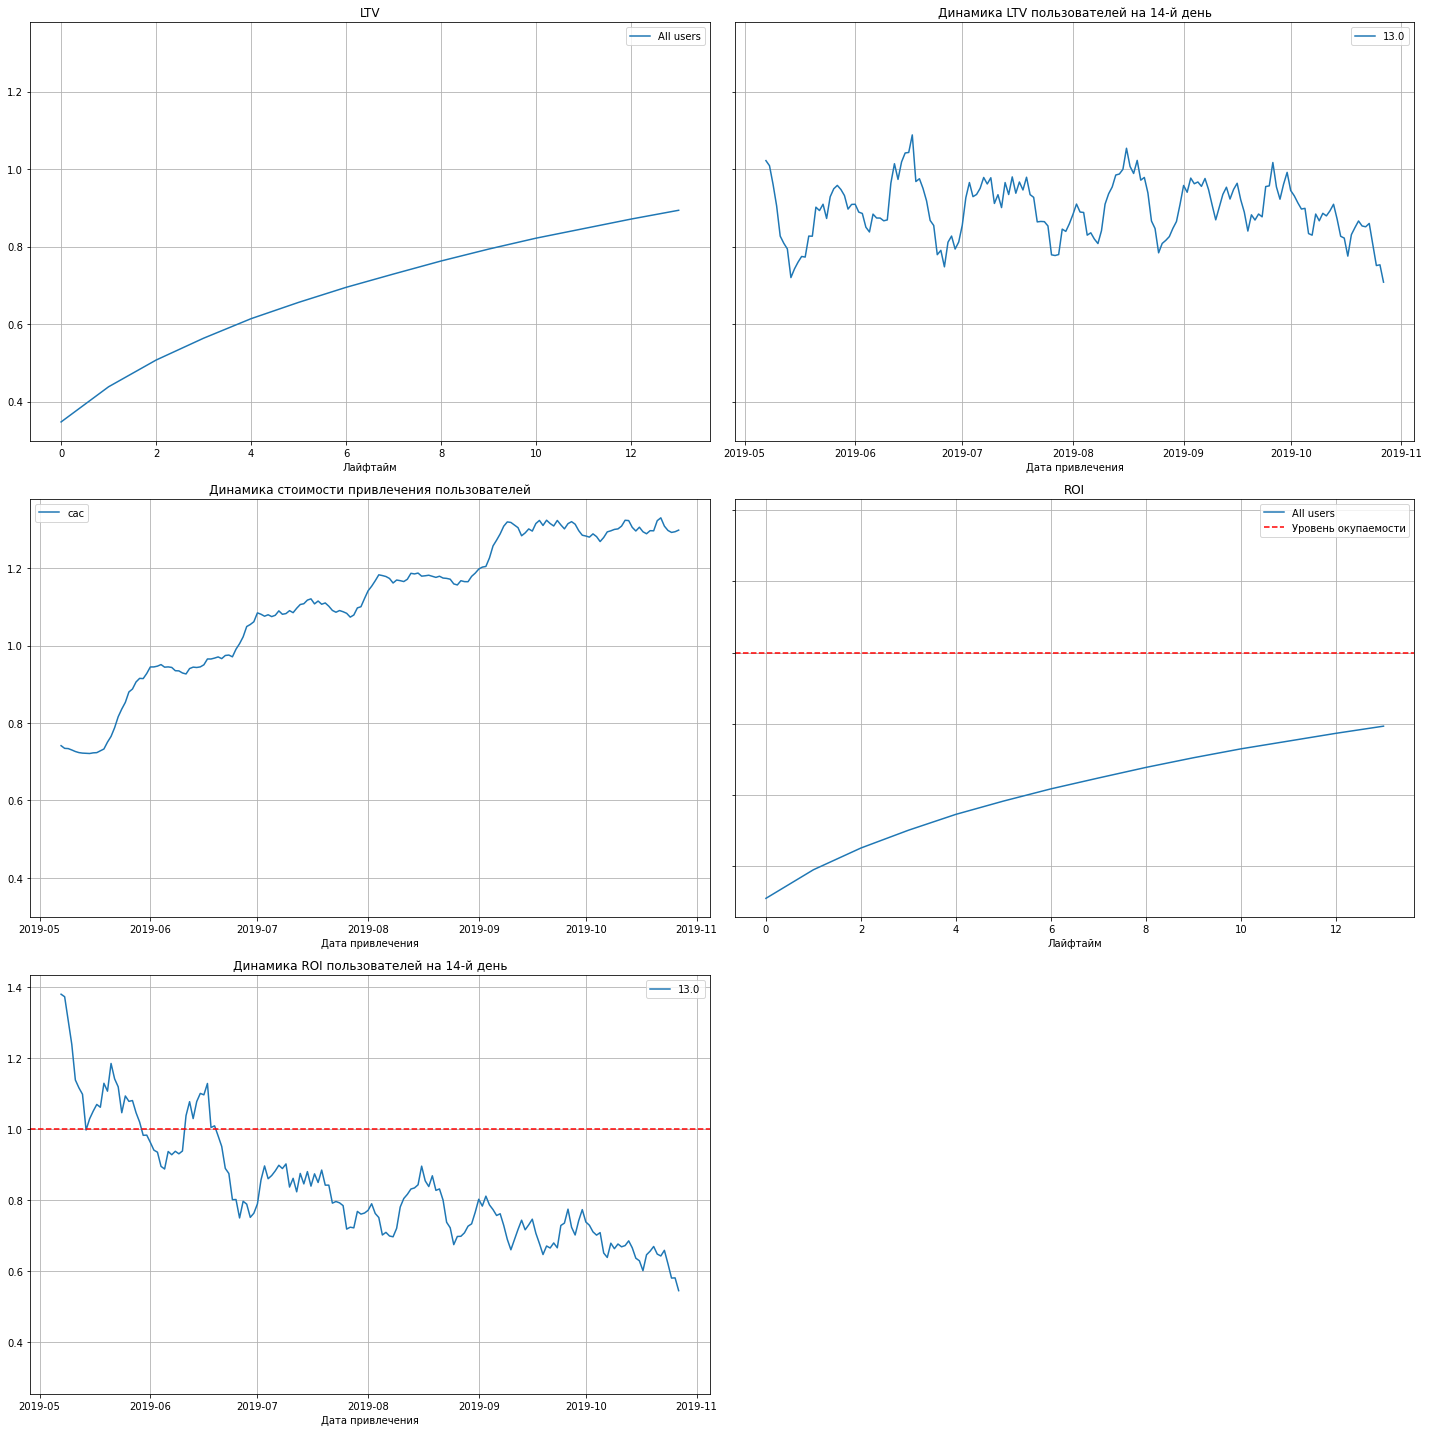

In [32]:
# Задаем значения
observation_date = datetime(2020, 11, 1).date()
analysis_horizon = 14
horizon_days = 14

# Применяем функцию
dimensions = []
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, 
                                                                      observation_date, analysis_horizon)

# Строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon)

- CAC (стоимость привлечения клиента) тоже увеличивается
- ROI (окупаемость инвестиций) не ушел за уровень окупаемости
- LTV (ценность клиента) увеличивается

В формировании затрат имеются аномалии. Стоит пересмотреть и оптимизировать расход средств на рекламу.

##### Проверим конверсию пользователей и динамику её изменения.

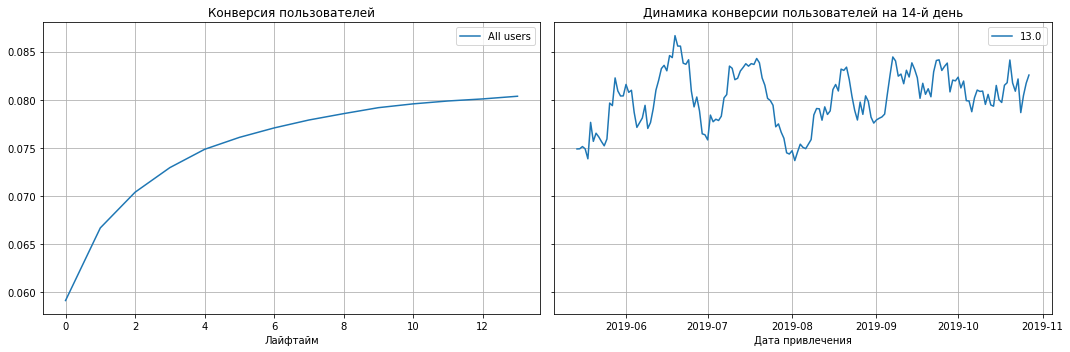

In [33]:
# Применяем функцию
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, 
                        orders, observation_date, analysis_horizon, dimensions=dimensions)

# Строим графики
plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

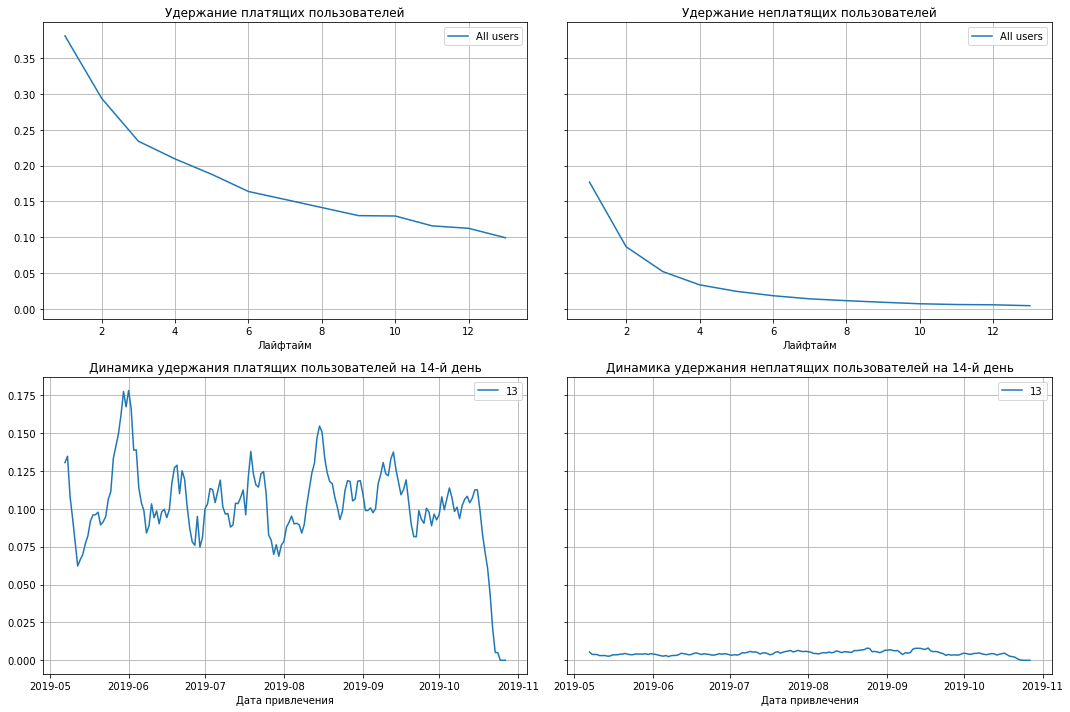

In [34]:
# Применяем функцию
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days)

# Строим графики
plot_retention(retention_grouped, retention_history, horizon_days) 

Мы видим отрицательную динамику удержания при стабильных показателях конверсии пользователей. Видим аномалию в динамике удержания.

##### Проанализируем окупаемость рекламы с разбивкой по устройствам.

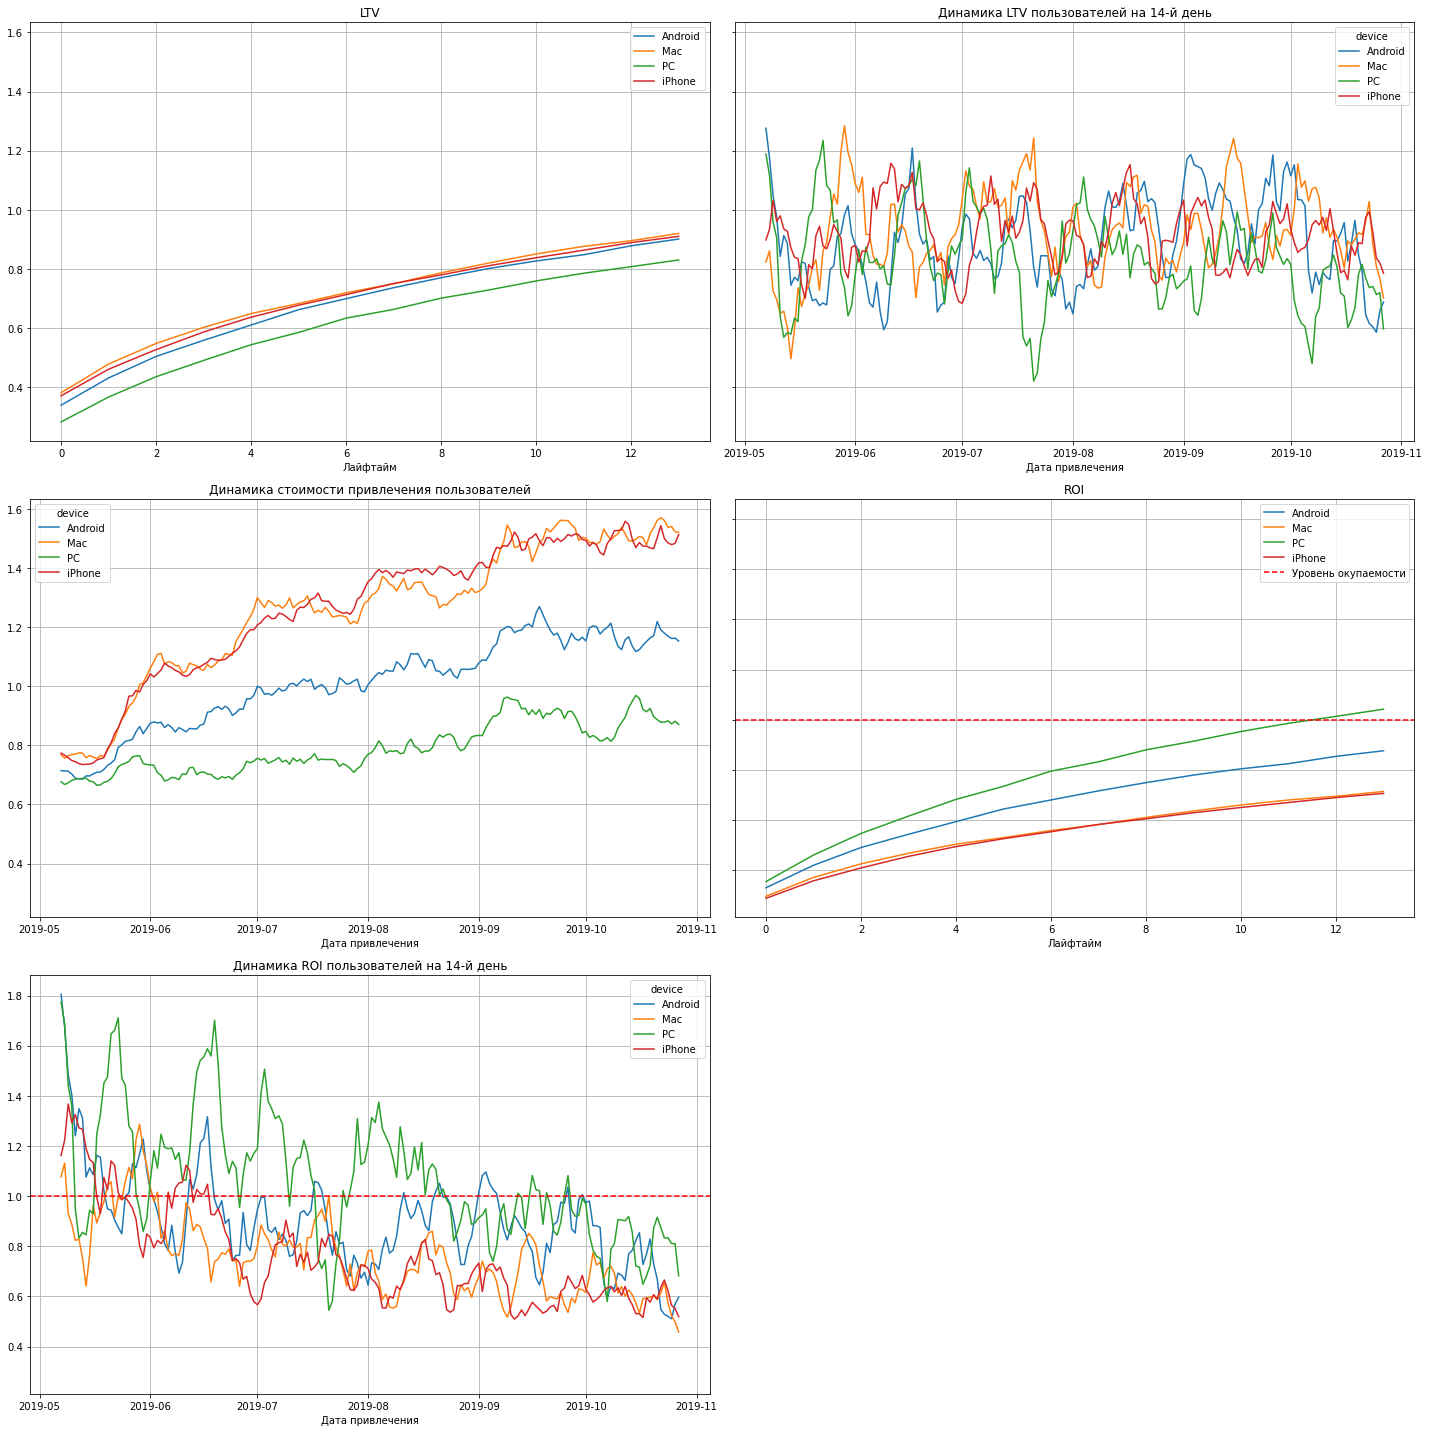

In [35]:
# Применяем функцию
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=['device'])

# Строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon)

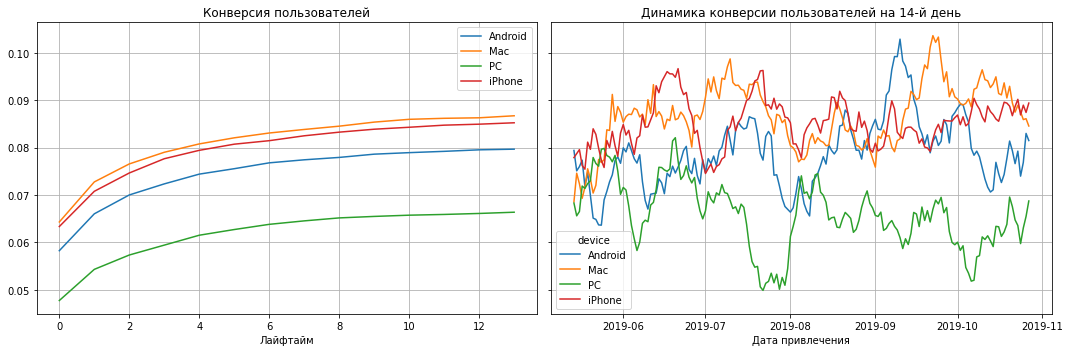

In [36]:
# Применяем функцию
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=['device'])

# Строим графики
plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

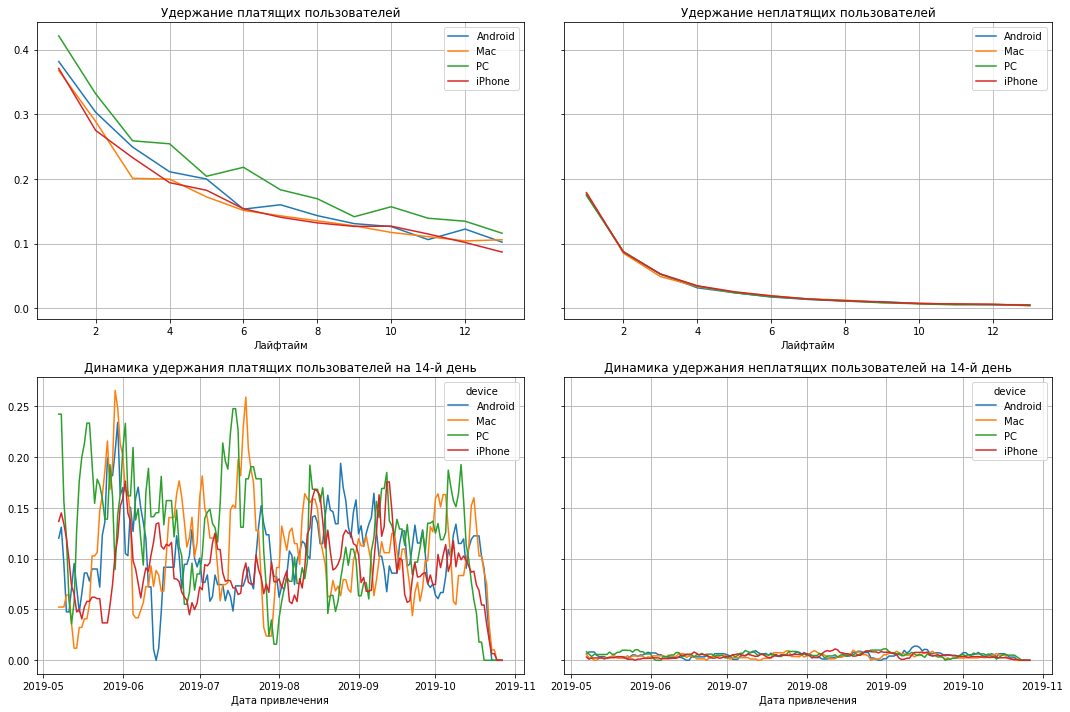

In [37]:
# Применяем функцию
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=['device'])

# Строим графики
plot_retention(retention_grouped, retention_history, analysis_horizon)

Реклама не окупается нигде, кроме PC. При этом стоимость привлечения пользователя существенно растет на продукции Apple. В динамике ROI все платформы сильно просели. Динамика удержания платящих пользователей

##### Проанализируем окупаемость рекламы с разбивкой по странам. 

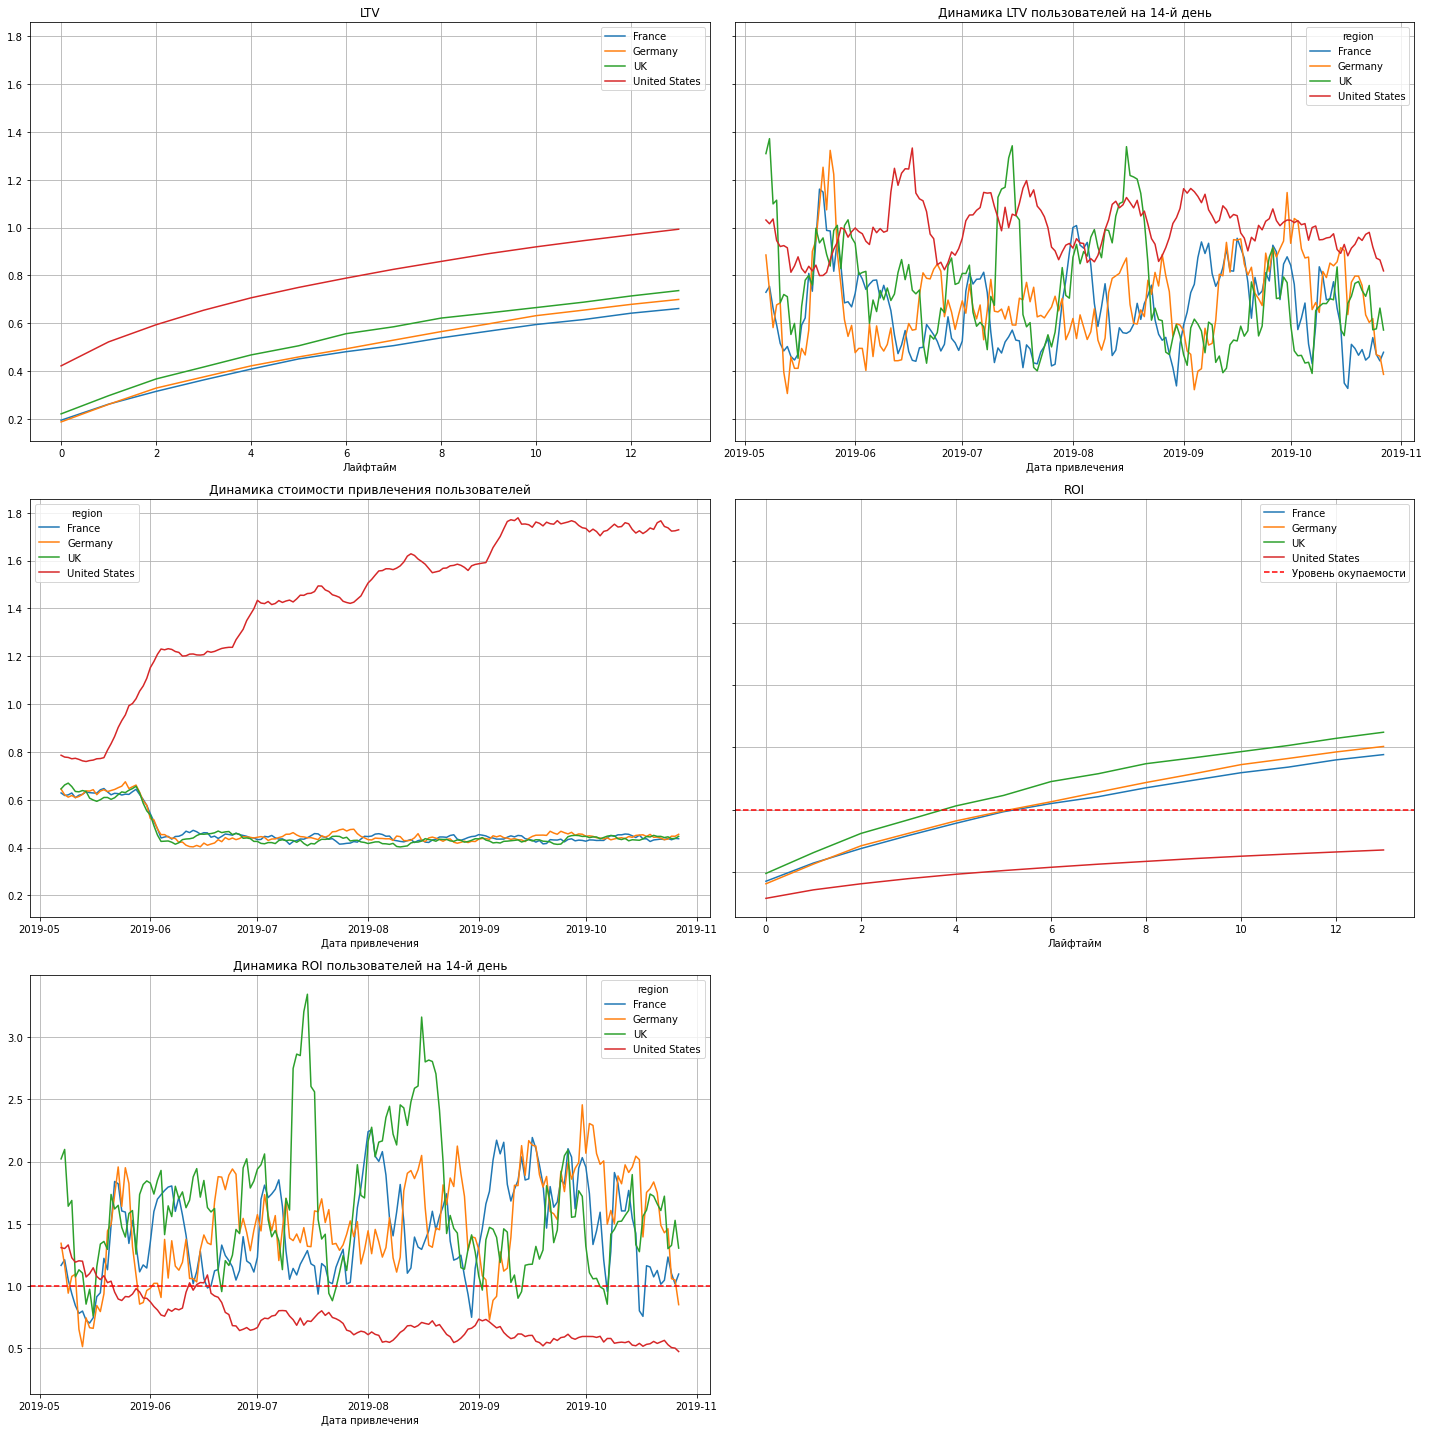

In [38]:
# Применяем функцию
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=['region'])

# Строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon)

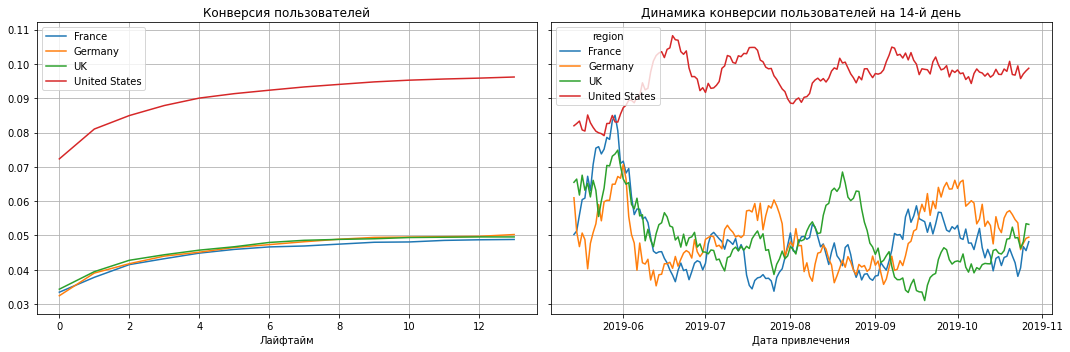

In [39]:
# Применяем функцию
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=['region'])

# Строим графики
plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

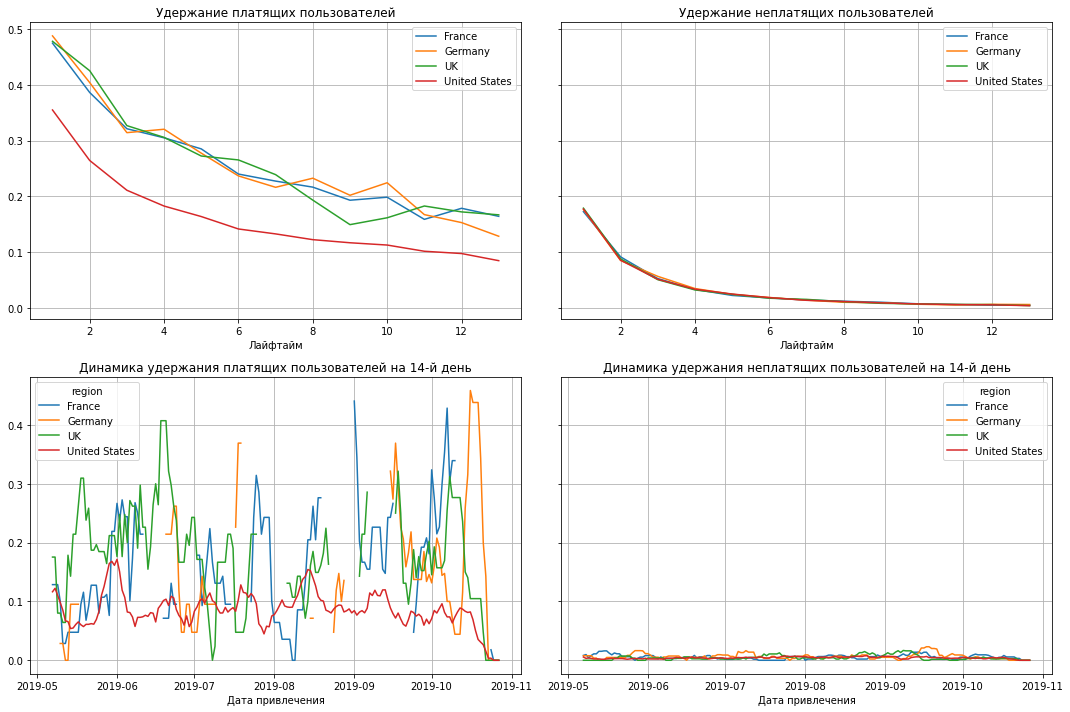

In [40]:
# Применяем функцию
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=['region'])

# Строим графики
plot_retention(retention_grouped, retention_history, analysis_horizon)

Видим сильную просадку по США. Привлечение пользователя растет. В данном регионе реклама не окупается. Единственный регион с аномальным поведением показателей.

##### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам.

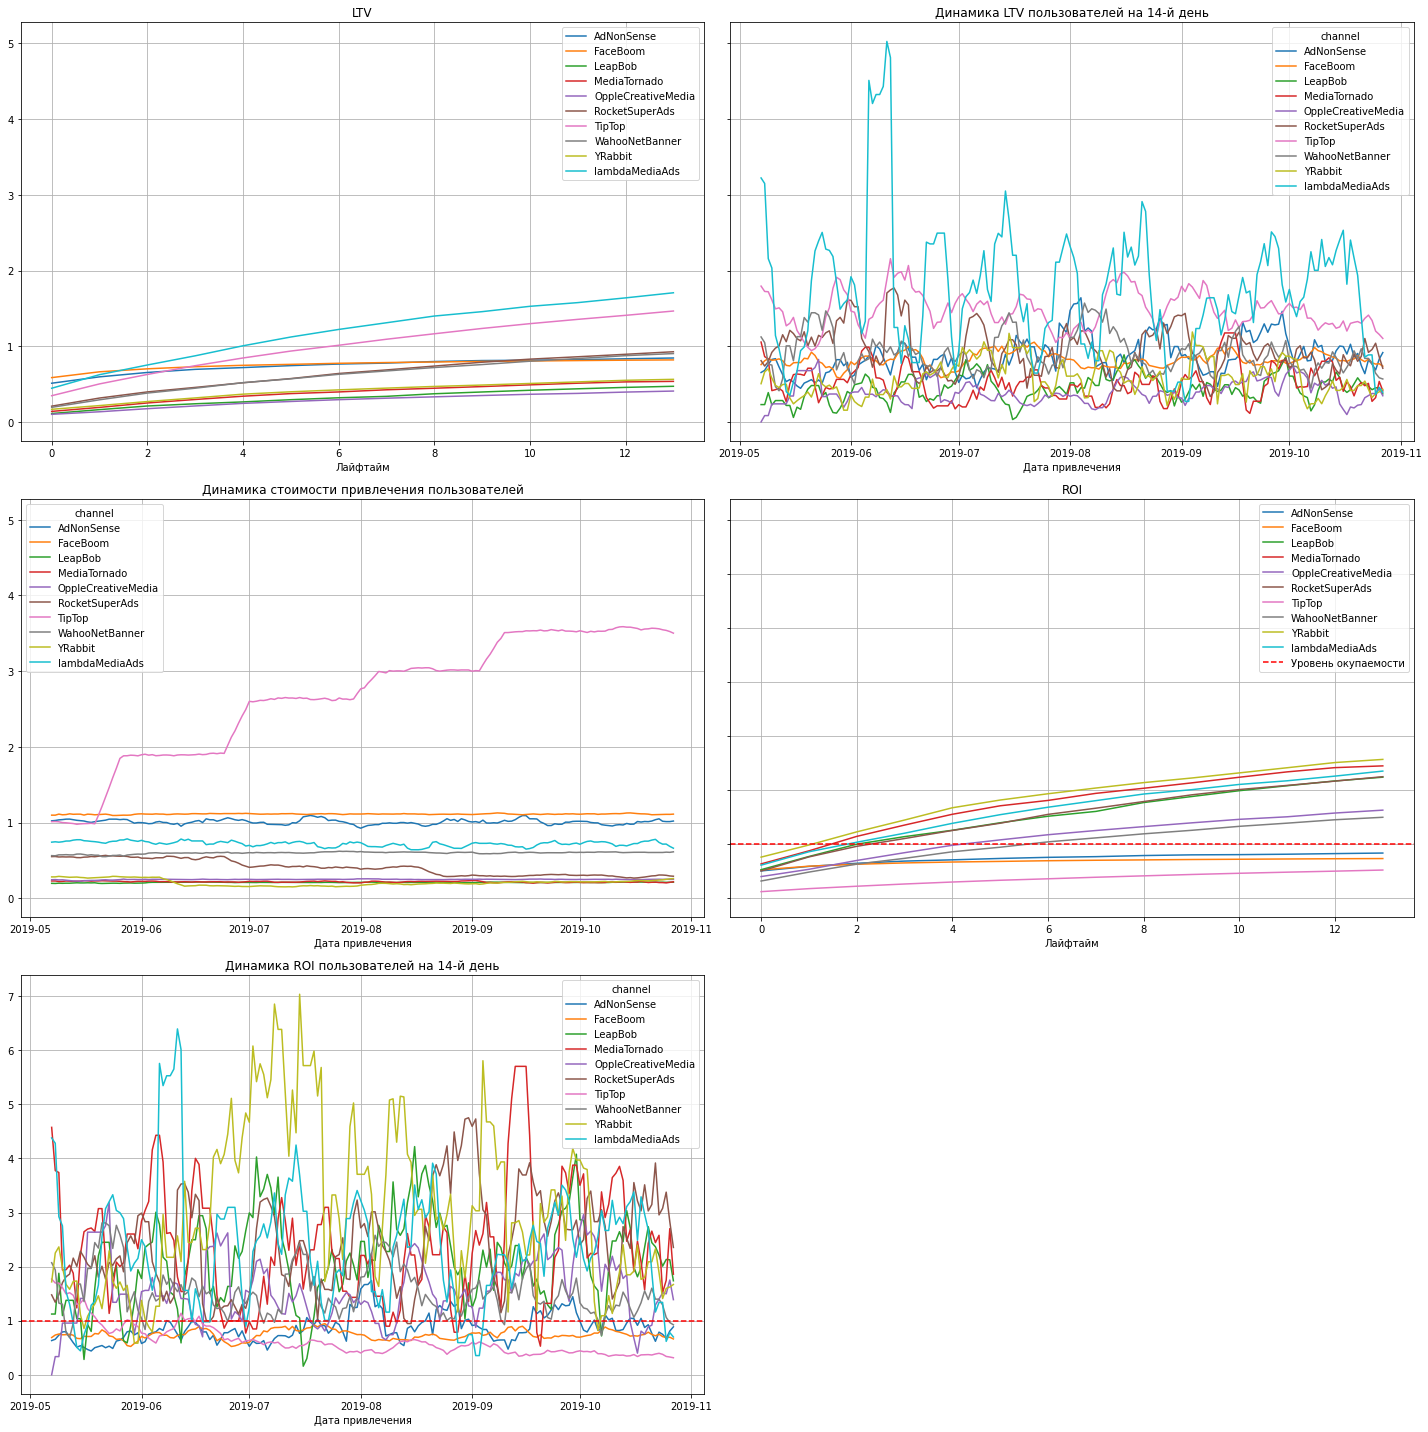

In [41]:
# Применяем функцию
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=['channel'])

# Строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon)

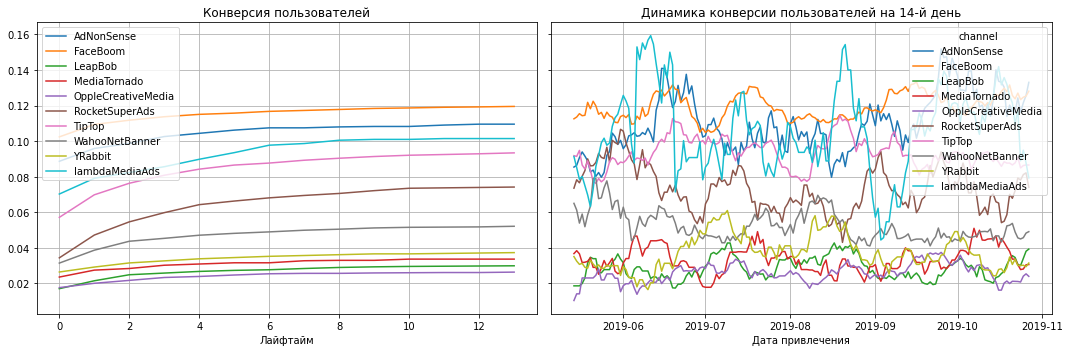

In [42]:
# Применяем функцию
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=['channel'])

# Строим графики
plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

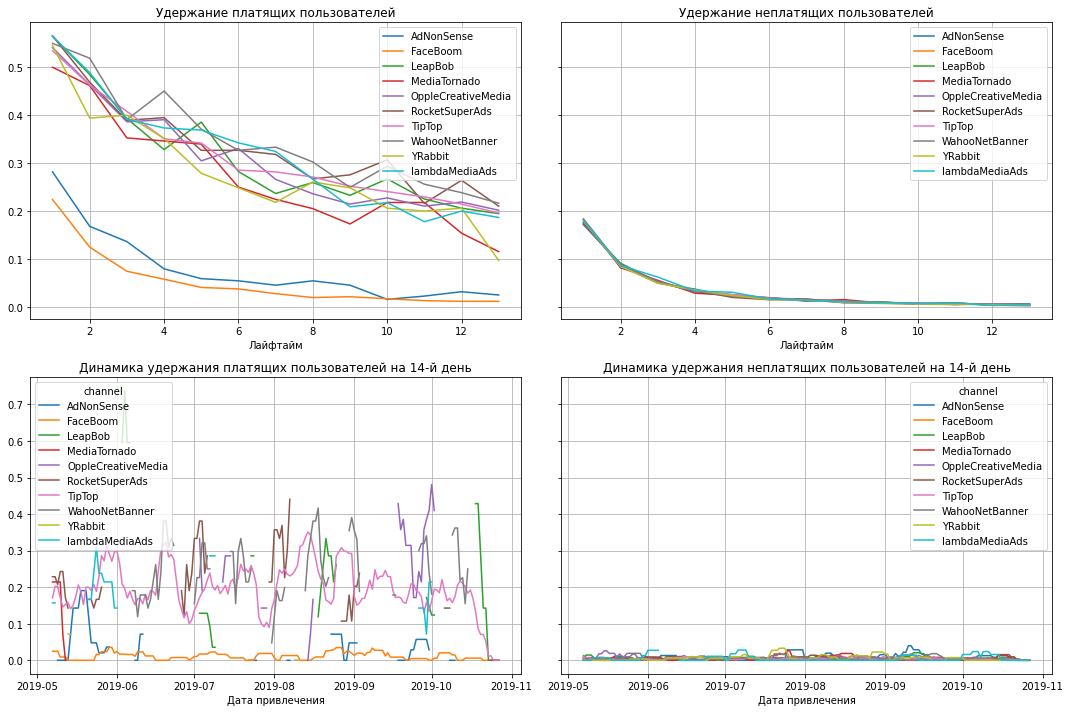

In [43]:
# Применяем функцию
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=['channel'])

# Строим графики
plot_retention(retention_grouped, retention_history, analysis_horizon)

AdNonSence, FaceBoom, TipTop не окупаются. При этом стоимость привлечения клиента у TipTop сильно растет. YRabbit, MediaTornado, LeapBob являются лидерами по окупаемости, хотя cac у данных приложений являтся одним из минимальных.

#### Вывод: 

В целом мы видим окупаемость рекламы, но есть негативные факторы:
1. Мы видим отрицательную динамику ROI по США. Конверсия выше чем в других регионах, однако удержание пользователей - заметно ниже. Стоимость привлечения клиентов, по сравнению с другими странами сильно растет. 
2. Стоимоть привлечения пользователя по продукции Apple растет, что негативно сказывется на окупаемости рекламы. Только PC показывает положительный ROI из всех устройств. При этом Конверсия у iPhone и Mac выше, чем у остальных девайсов.
3. Приложения AdNonSence, FaceBoom, TipTop. Приложения не окупаются. При хорошей конверсии мы видим плохие показатели удержания. 


#### 7. Выводы


**Выводы по ходу исследования:**

-	Количество платящих пользователей в США больше, чем в остальных странах. Возможно следует скорректировать маркетинговую компанию в остальных странах, чтобы улучшить кол-во платящих пользователей. 
-	Так же стоит отметить факт того, что продукция Apple имеет в целом более лояльную аудиторию, которая готова платить за контент.
-	Исходя из данных привлечения аудитории с приложений - можно сделать сказать, что в целом приложения слабо привлекают аудиторию, за исключением FaceBoom и TipTop. Возможно, стоит попробовать другие источники привлечения аудитории.

При суммарных расходах на маркетинг в 105497, 80% идут на 2 канала из 10 - TipTop и FaceBoom. Важно отметить, что при затратах в 30% бюджета на канал FaceBoom, он дает больше клиентов, чем лидер по тратам - TipTop. Стоимость привлечения клиента так же ниже для FaceBoom. Возможно, стоит маркетинговые перераспределить расходы по каналам, чтобы добиться лучшего результата.

В целом мы видим окупаемость рекламы, но есть негативные факторы:
- Мы видим отрицательную динамику ROI по США. Конверсия выше чем в других регионах, однако удержание пользователей - заметно ниже. Стоимость привлечения клиентов, по сравнению с другими странами сильно растет. 
- Стоимоть привлечения пользователя по продукции Apple растет, что негативно сказывется на окупаемости рекламы. Только PC показывает положительный ROI из всех устройств. При этом Конверсия у iPhone и Mac выше, чем у остальных девайсов.
- Приложения AdNonSence, FaceBoom, TipTop. Приложения не окупаются. При хорошей конверсии мы видим плохие показатели удержания.


1.	По окупаемости в разрезе стран проблемы наблюдаются только у США. Стоит обратить на это отдельное внимание. Данная страна является лидером по количеству пользователей в целом и по количеству платящих пользователей. Конверсия на хорошем уровне, но при этом, анализ показал, что реклама по данному региону не окупается, а стоимость привлечения пользователей растет. 
2.	По платформам: Окупаемость наблюдаем у PC при том, что доля платящих пользователей – минимальна по сравнению с остальными платформами. В сегменте смартфонов лидирует – iPhone, а в компьютерах – MAC. Данные платформы дают наибольший прирост платящих пользователей, имеют хороший показатель конверсии, но ROI – не выходит в окупаемость, а стоимость привлечения клиентов у Apple стремительно растет. На это стоит обратить внимание при планировании бюджета на маркетинг.
3.	В разрезе игр - TipTop и FaceBoom являются лидерами по платящим пользователям. Данные приложения тратят 80% бюджета, при этом ROI по данным играм, включая AdNonSence, который не выходит в окупаемость. 
---

**Рекомендации для отдела маркетинга:**

1.	Поработать с рынком США, для оптимизации бюджета в целях окупаемости данного рынка. Следует обратить внимание на удержание клиентов, т.к. этот показатель негативно сказывается на окупаемости рекламы. Возможно, стоит делать больше сезонных и праздничных распродаж, рассчитанных на американский рынок внутри приложения.
2.	Провести оптимизацию расходов по платформам. Стоит обратить внимание на Android. Данная платформа находится на втором месте по привлечению платящих клиентов и почти уходит в окупаемость. Можно перераспределить бюджет, забрав часть у Apple. В целом у "Яблока" хорошие показатели конверсии и нормальные показатели удержания, но стоимость привлечения клиента существенно выше, чем у остальных платформ. Советую оптимизировать затраты по данным девайсам.
3.	Перераспределить бюджет по играм. TipTop не оправдала своих ожиданий. Предлагаю не использовать данный канал, т.к. при хороших показателях конверсии и удержания данный канал не уходит в окупаемость, а затраты на него составляют 50% бюджета. Так же ниже окупаемости находятся AdNonSense и TipTop. Тут следует поработать с удержанием клиента, т.к. это единственный негативный показатель. Возможно можно применить внутриигровые распродажи, т.к. клиенты быстро перестают приносить прибыль через данные источники.